<a href="https://colab.research.google.com/github/assanesar/dddd/blob/main/detection_des_especes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='yellow'> Projet Machine Learning: Classification des feuilles d'arbres</font>

L'objectif de ce projet est d'utiliser des images de feuilles et des caractéristiques extraites, y compris la forme, la marge et la texture, pour identifier avec précision 99 espèces de plantes. Les feuilles, en raison de leur volume, de leur prévalence et de leurs caractéristiques uniques, sont un moyen efficace de différencier les espèces végétales. Ils fournissent également une introduction amusante à l'application de techniques qui impliquent des fonctionnalités basées sur l'image.

## <font color='green'> Description des données</font>

L'ensemble de données se compose d'environ 1 584 images de spécimens de feuilles (16 échantillons de 99 espèces chacune) qui ont été converties en feuilles noires binaires sur fond blanc. Trois ensembles de caractéristiques sont également fournis par image : un descripteur de forme contiguë, un histogramme de texture intérieure et un histogramme de marge à échelle fine. Pour chaque caractéristique, un vecteur de 64 attributs est donné par échantillon de feuille.

### Description des fichiers

- **train.csv :** ensemble d'apprentissage
- **test.csv :** ensemble de test
- **sample_submission.csv :**  un exemple de fichier de soumission au format correct
- **images :** les fichiers image (chaque image est nommée avec son identifiant correspondant)

### Variables

- **id :** un identifiant anonyme unique à une image
- **margin_1, margin_2, margin_3, ..., margin_64 :** chacun des 64 vecteurs d'attributs pour l'entité de marge
- **shape_1, shape_2, shape_3, ..., shape_64 :**  chacun des 64 vecteurs d'attributs pour l'entité de forme
- **texture_1, texture_2, texture_3, ..., texture_64 :** chacun des 64 vecteurs d'attributs pour la caractéristique de texture

Lien vers les données: https://www.kaggle.com/competitions/leaf-classification/data

## <font color='green'>Preparation de l'environnement de travail</font>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import os

In [ ]:
os.listdir()

['.config', 'sample_data']

In [ ]:
os.listdir('/gdrive')

['.shortcut-targets-by-id', 'MyDrive', '.file-revisions-by-id', '.Trash-0']

In [ ]:
os.listdir('/gdrive/MyDrive/Projet ML M2/Data')

['train.csv', 'test.csv', 'sample_submission.csv', 'images']

## <font color='green'>Importation des librairies</font>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import imblearn
import time
import matplotlib.pyplot as plt
np.random.seed(42)

#train_test_split/fractionnement des données
from sklearn.model_selection import  train_test_split

# modèles à partir de scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Encodage
from sklearn.preprocessing import LabelEncoder

# evaluation du modèle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## <font color='green'>Importation des données</font>

In [ ]:
train = pd.read_csv("/gdrive/MyDrive/Projet ML M2/Data/train.csv")
train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [ ]:
test = pd.read_csv("/gdrive/MyDrive/Projet ML M2/Data/test.csv")
test.head(5)

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [ ]:
train.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [ ]:
# types de variables
train.dtypes

id             int64
species       object
margin1      float64
margin2      float64
margin3      float64
              ...   
texture60    float64
texture61    float64
texture62    float64
texture63    float64
texture64    float64
Length: 194, dtype: object

In [ ]:
# nombres de ligne et nombres de colonnes
train.shape

(990, 194)

## <font color='green'>Quelques visualisations</font>

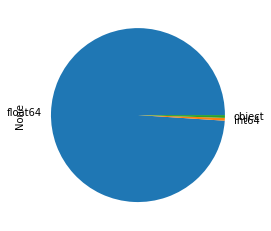

In [ ]:
# repartition des variables
train.dtypes.value_counts().plot.pie()

In [ ]:
train.isna().sum() # pas de valeurs manquantes

id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64

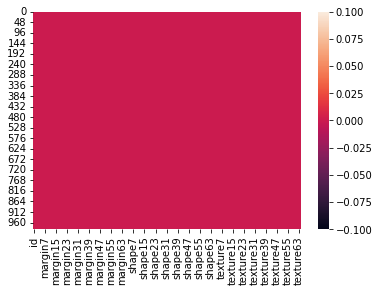

In [ ]:
# Analyse graphiques des valeur manquantes
sns.heatmap(train.isna())

In [ ]:
train["species"].value_counts()

Acer_Opalus                    10
Crataegus_Monogyna             10
Acer_Mono                      10
Magnolia_Heptapeta             10
Acer_Capillipes                10
                               ..
Alnus_Rubra                    10
Rhododendron_x_Russellianum    10
Cytisus_Battandieri            10
Liriodendron_Tulipifera        10
Sorbus_Aria                    10
Name: species, Length: 99, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]),
 <a list of 99 Text major ticklabel objects>)

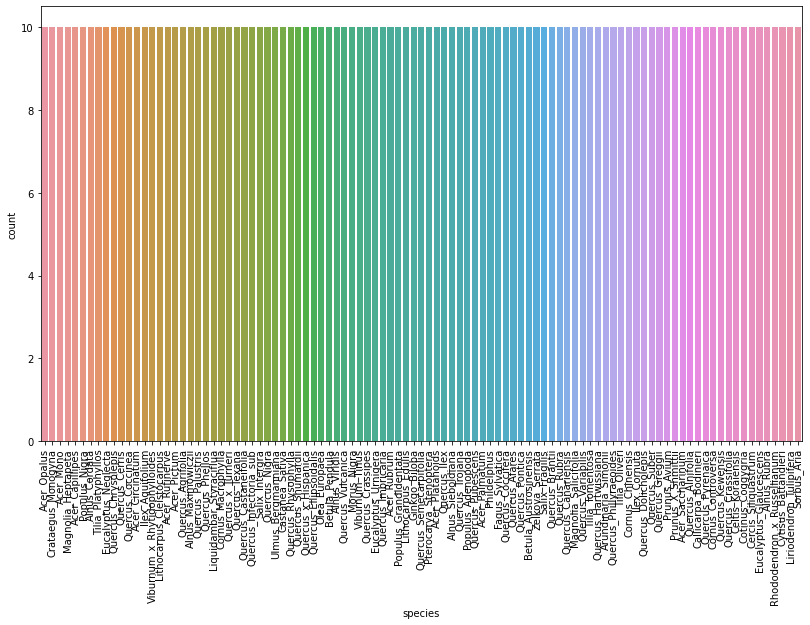

In [ ]:
# Répartition des différents types de feuilles
fig = plt.figure(figsize= (30,8))
plt.subplot(121)
sns.countplot(x = 'species', data = train , order = train['species'].value_counts().index);
plt.xticks(rotation = 90)

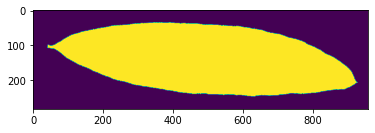

In [ ]:
# Visualisation d'une feuille particulière
from PIL import Image
import matplotlib.image as mpimg
filenames = os.listdir('/gdrive/MyDrive/Projet ML M2/Data/images')
filenames
image = Image.open('/gdrive/MyDrive/Projet ML M2/Data/images/1484.jpg')
plt.imshow(image)
plt.show()


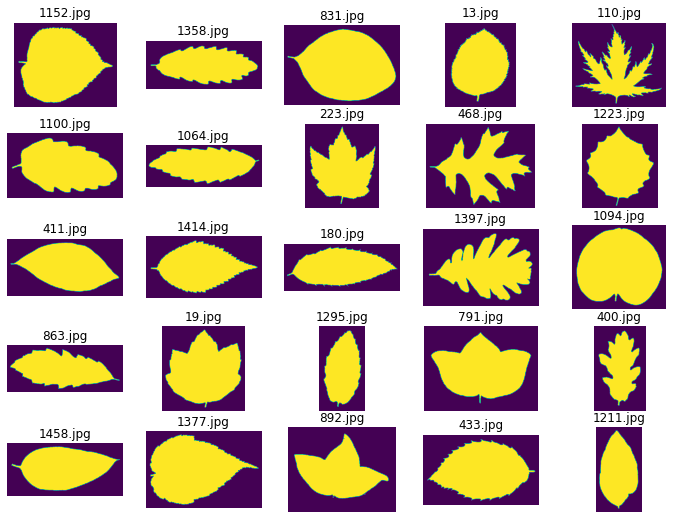

In [ ]:
# Visualisation des différents types de feuilles
samples_images = np.random.choice(os.listdir('/gdrive/MyDrive/Projet ML M2/Data/images'),size = 25)

plt.figure(figsize = (12,9))
for i,im in enumerate(samples_images):
    ax = plt.subplot(5,5,i+1)
    img = Image.open(os.path.join('/gdrive/MyDrive/Projet ML M2/Data/images',im))
    ax.set_title(im)
    plt.axis("off")
    plt.imshow(img)

In [ ]:
train_quan = train.drop("species", axis=1)

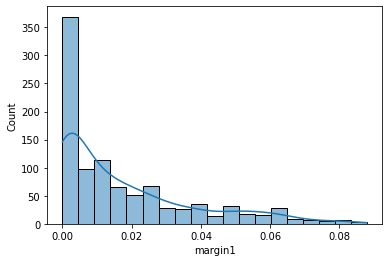

In [ ]:
sns.histplot(train["margin1"], kde=True)

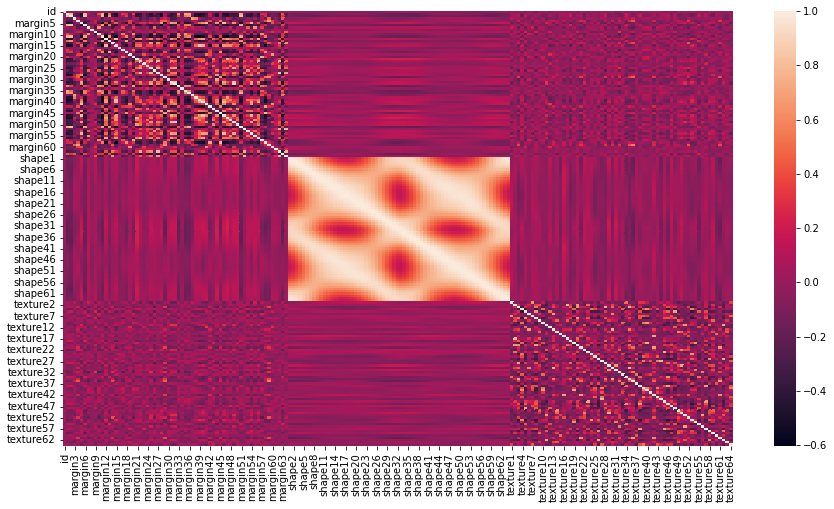

In [ ]:
# Matrice de corrélation
plt.figure(figsize=(15,8))
sns.heatmap(data=train.corr())

## <font color='green'>Apprentissage et test</font>

L'objectif ici est de récupérer les ensembles X_train, y_train, X_test et y_test

In [ ]:
X = train.drop(["species", "id"], axis=1)
y = train['species']

Nous remarquons que la variable cible contient le nom des différents types de feuilles. Elle est donc qualitative. Nous devons la transformer en quantitative. Pour se faire nous allons utiliser l'objet ***LabelEncoder().***

In [ ]:
# Encodage de la variable y
encoder = LabelEncoder()
y_fit = encoder.fit(y)
y_label = y_fit.transform(y)
y_label.shape
#classes = list(y_fit.classes_)
#classes

(990,)

In [ ]:
# 80% des données d'apprentissage et 20% de test
X_train, X_test, y_train, y_test = train_test_split(X,y_label, test_size = 0.2, random_state =1)

## <font color='green'>Modélisation</font>



Dans cette partie, nous allons tourner 4 différents modèles sur les données notamment **KNeighborsClassifier, AdaBoost, Arbre de décision et Foret aléatoires**

- Nous allons dans un premier temps tester ces modèles sans ajuster les hyperparamètres
- Ensuite nous allons tester les modèles en ajustant les hyperparamètres
- Pour finir nous allons comparer les performances de chaque modèle afin de retenir celui qui s'entraine mieux sur les données.

#### Modèles sans les hyperparamètres

In [ ]:
# on met les modèles qu'on va utiliser dans un dictionnaire

models = {"KNN": KNeighborsClassifier(),
          "AdaBoost": AdaBoostClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier()}


# une fonction qui instancie et qui affiche le score des différents modèles utilisés
def fit_and_score(models, X_train, X_test, y_train, y_test):


    # set random seed
    np.random.seed(42)
    # un dictionnaire qui enrégistre les scores des modèles
    model_scores_1 = {}
    # loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        # evaluate a model and append it score to model scores
        model_scores_1[name] = model.score(X_test, y_test)
    return model_scores_1

In [ ]:
%%time
model_scores_1 = fit_and_score(models=models,
                              X_train=X_train,
                              X_test=X_test,
                              y_train=y_train,
                              y_test=y_test)
model_scores_1

CPU times: user 3.23 s, sys: 120 ms, total: 3.35 s
Wall time: 3.26 s


{'KNN': 0.8686868686868687,
 'AdaBoost': 0.015151515151515152,
 'Decision Tree': 0.5252525252525253,
 'Random Forest': 0.9747474747474747}

#### Modèles avec les hyperparamètres

##### KNN

In [ ]:
# Grille des hyperparamètres
%%time
# creation d'un dictionnaire d'hyperparamètres pour le KNN
k_range = [1,3,5,7,9,11,13,15,17,19,21,23,25]
# Un autre paramètre, outre k, que nous pouvons faire varier est celui des poids
# options par défaut --> uniforme (tous les points du voisinage sont pondérés de manière égale)
# une autre option --> distance (les voisins les plus proches sont pondérés plus fortement que les voisins les plus éloignés)
weight_options = ['uniform', 'distance']
# dictionnaire des hyperparamètres pour le KNN
knn_grid = {"n_neighbors": k_range,
            "weights": weight_options}

knn = KNeighborsClassifier()
gs_knn = gs_knn = GridSearchCV(knn,
                      param_grid=knn_grid,
                      cv=10,
                      verbose=True)
gs_knn.fit(X_train, y_train)

Fitting 10 folds for each of 26 candidates, totalling 260 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


CPU times: user 4.72 s, sys: 3.39 s, total: 8.11 s
Wall time: 4.33 s


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25],
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [ ]:
# Meilleurs hyperparamètres
print(f"Les meilleurs hyperparamètres du modèle KNN: {gs_knn.best_params_}")

Les meilleurs hyperparamètres du modèle KNN: {'n_neighbors': 1, 'weights': 'uniform'}


In [ ]:
# Evaluation du modèle sur l'ensemble test
print(f"Le modèle KNN a une performance de {gs_knn.score(X_test,y_test)*100:.2f} % sur l'ensemble test")

Le modèle KNN a une performance de 89.90 % sur l'ensemble test


##### AdaBoost

In [ ]:
%%time
# Grille des hyperparamètres
adb_grid = {"n_estimators": [50, 100, 150],
            "learning_rate": [0.5, 1, 2]}

# configuration de la recherche d'hyperparamètres
gs_adb = GridSearchCV(AdaBoostClassifier(),
                      param_grid=adb_grid,
                      cv=5,
                      verbose=True)

#modèle de recherche des hyperparamètres de la grille d'ajustement
gs_adb.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


CPU times: user 1min 38s, sys: 343 ms, total: 1min 38s
Wall time: 1min 38s


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.5, 1, 2],
                         'n_estimators': [50, 100, 150]},
             verbose=True)

In [ ]:
# Meilleurs hyperparamètres
print(f"Les meilleurs hyperparamètres du modèle AdaBoost: {gs_adb.best_params_}")

Les meilleurs hyperparamètres du modèle AdaBoost: {'learning_rate': 2, 'n_estimators': 150}


In [ ]:
# Evaluation du modèle sur l'ensemble test
print(f"Le modèle AdaBoost a une performance de {gs_adb.score(X_test,y_test)*100:.2f} % sur l'ensmeble test")

Le modèle AdaBoost a une performance de 20.71 % sur l'ensmeble test


##### Decision Tree

In [ ]:
%%time
# Grille des hyperparamètres
dt_grid = {"criterion": ['gini','entropy'],
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 10, 2),
          "min_samples_leaf": np.arange(1, 10, 2)}

# configuration de la recherche d'hyperparamètres
gs_dt = GridSearchCV(DecisionTreeClassifier(),
                      param_grid=dt_grid,
                      cv=5,
                      verbose=True)

#modèle de recherche des hyperparamètres de la grille d'ajustement
gs_dt.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


CPU times: user 4min 2s, sys: 211 ms, total: 4min 2s
Wall time: 4min 2s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'min_samples_split': array([2, 4, 6, 8])},
             verbose=True)

In [ ]:
# Meilleurs hyperparamètres
print(f"Les meilleurs hyperparamètres du modèle Decision Tree: {gs_dt.best_params_}")

Les meilleurs hyperparamètres du modèle Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [ ]:
# Evaluation du modèle sur l'ensemble test
print(f"Le modèle Decision Tree a une performance de {gs_dt.score(X_test, y_test)*100:.2f} % sur l'ensemble test")

Le modèle Decision Tree a une performance de 61.11 % sur l'ensemble test


##### Random Forest

In [ ]:
%%time
rf_grid = {"n_estimators": np.arange(10, 350, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 10, 2),
          "min_samples_leaf": np.arange(1, 10, 2)}


gs_rf = GridSearchCV(RandomForestClassifier(),
                           param_grid=rf_grid,
                           cv=5,
                           verbose=True)

gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 560 candidates, totalling 2800 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


CPU times: user 48min 45s, sys: 5.88 s, total: 48min 51s
Wall time: 48min 49s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310])},
             verbose=True)

In [ ]:
# Meilleurs hyperparamètres
print(f"Les meilleurs hyperparamètres du modèle Random Forest: {gs_rf.best_params_}")

Les meilleurs hyperparamètres du modèle Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 310}


In [ ]:
# Evaluation du modèle sur l'ensemble test
print(f"Le modèle Random Forest a une performance de {gs_rf.score(X_test, y_test)*100:.2f} % sur l'ensemble test")

Le modèle Random Forest a une performance de 97.47 % sur l'ensemble test


#### Comparaison des modèles (avec et sans hyperparamètres)

In [ ]:
recap = pd.DataFrame({"Score modèle de base": [model_scores_1.get("KNN")*100,model_scores_1.get("AdaBoost")*100,model_scores_1.get("Decision Tree")*100,model_scores_1.get("Random Forest")*100],
                      "Score tuning (GridSearchCV)": [gs_knn.score(X_test,y_test)*100,gs_adb.score(X_test,y_test)*100,gs_dt.score(X_test, y_test)*100,gs_rf.score(X_test, y_test)*100]})
recap.index = ["KNN", "AdaBoost","Decision Tree","Random Forest"]
recap

,Score modèle de base,Score tuning (GridSearchCV)
KNN,86.868687,89.898990
AdaBoost,1.515152,20.707071
Decision Tree,52.525253,61.111111
Random Forest,97.474747,97.474747


Nous retenons que c'est le modèle **Random Forest** qui a la meilleure performance sur les données suivi du **KNN** avec ou sans l'ajustement des hyperparamètres.

##### Prédiction

Prédiction avec le Random Forest

In [ ]:
y_preds = gs_rf.predict(X_test)
y_preds

array([90, 47,  2,  3,  6, 90, 93, 75, 71, 26, 30, 54, 85, 24, 93, 49, 89,
       46, 10, 32, 20, 18, 92, 21, 11, 63, 72, 62, 50,  5, 59, 55, 69, 43,
       55, 73, 42, 54,  0, 93,  2, 34, 65, 48, 31, 32, 12,  3, 28, 15, 83,
       17, 95, 69,  5, 41, 27, 61, 41, 33, 70, 66, 23, 63,  0,  4, 53, 48,
        9, 89, 21, 82, 33, 23, 21, 37,  3, 20, 65, 96, 82, 15, 12, 98, 54,
       61, 64, 33,  4, 83, 12, 28, 14, 94, 54, 30, 62, 50, 26,  1, 19, 96,
       19, 33, 78,  9, 22, 79, 40, 20, 86, 88, 95, 95, 18, 36, 61,  6, 94,
       46, 16, 77, 20, 87, 90, 60, 78,  7, 23, 93, 33, 65, 92, 39, 20, 41,
       84,  9, 60, 36, 66, 86,  0, 74, 95, 41, 11, 22, 26, 11, 53,  0, 58,
       13, 10, 52,  8, 53, 42, 87, 28, 77, 56, 14, 45, 98, 61, 44, 18, 96,
       91, 89, 70, 54, 25, 76, 97, 48, 94, 37, 61, 59, 59, 65, 39, 13,  4,
       97, 16, 68, 40, 63, 47, 22, 63, 39, 45,  6])

#### Matrice de confusion

In [ ]:
mat = confusion_matrix(y_true=y_test,y_pred=y_preds)
mat

array([[4, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 2]])

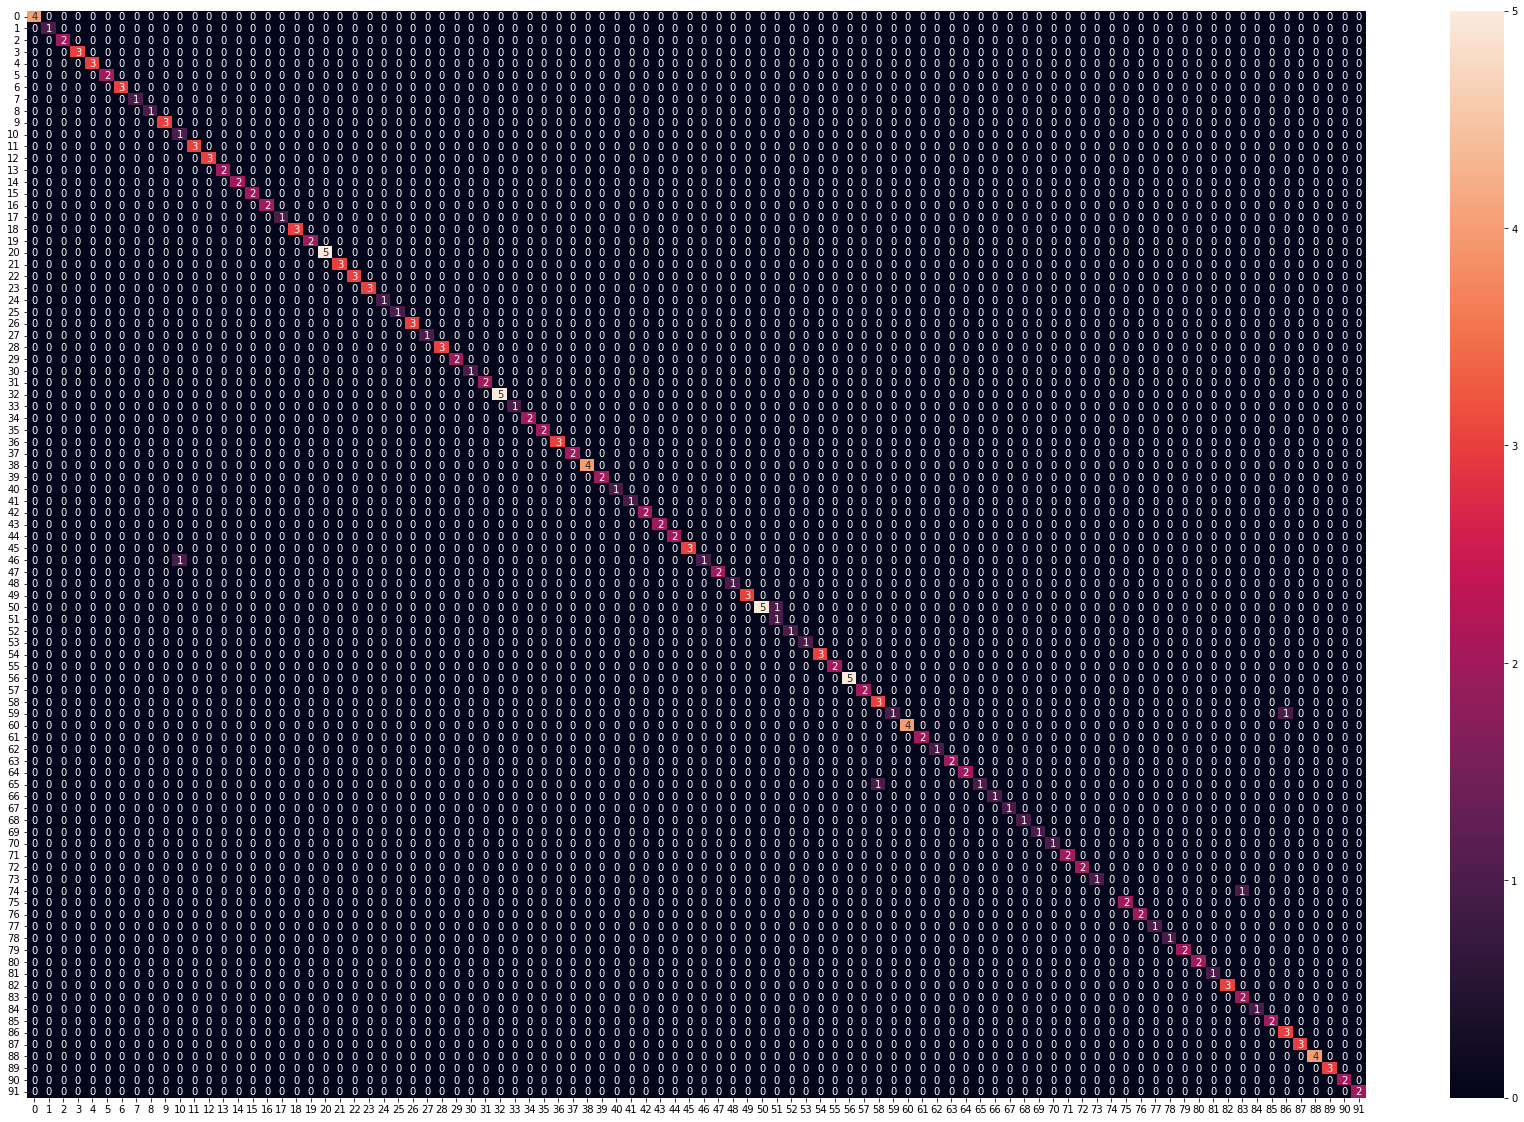

In [ ]:
plt.subplots(figsize=(30,20))
sns.heatmap(mat,annot=True)

##### Autres métriques

In [ ]:
print(classification_report(y_true=y_test,y_pred=y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         3
          10       0.50      1.00      0.67         1
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## <font color='green'>Importance des variables</font>

Cette partie a pour but de nous montrer les variables qui ont plus contribué dans le modèle de Random Forest avec GridSearchCV.

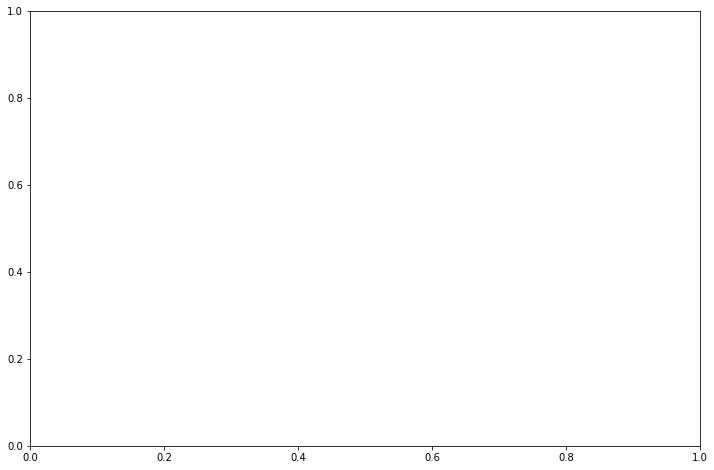

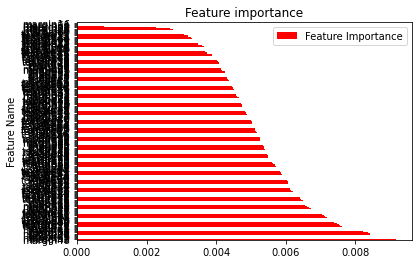

In [ ]:
#Feature importance
def display_feat_imp_rforest(rforest):
  feat_imp = rforest.best_estimator_.feature_importances_
  df_featimp = pd.DataFrame(feat_imp, columns = {"Feature Importance"})
  df_featimp["Feature Name"] = X_train.columns
  df_featimp = df_featimp.sort_values(by="Feature Importance", ascending=False)
  #plt.subplots(figsize=(12,8))
  df_featimp.plot.barh(y="Feature Importance", x="Feature Name", title="Feature importance", color="red")
  plt.show()
  return df_featimp

res=display_feat_imp_rforest(gs_rf)

In [ ]:
res

,Feature Importance,Feature Name
47,0.009163,margin48
2,0.009127,margin3
58,0.008946,margin59
112,0.008602,shape49
136,0.008430,texture9
...,...,...
51,0.002280,margin52
7,0.000779,margin8
33,0.000733,margin34
60,0.000534,margin61


Nous remarquons que les variables margin48, margin6, margin59 suivies de shape49, texture9... sont les variables qui ont plus contribué au modèle.

## <font color='yellow'>Conclusion</font>

Ce projet qui a pour objectif la classification des feuilles nous a permis d'utiliser différents modèles de Machine Learning comme KNN, AdaBoost, Arbre de Décsion et Forets aléatoires. Nous avons mis en place ces derniers dans un premier temps sans ajuster leurs hyperparamètres puis dans un second temps avec leurs hyparamètres en se basant sur GridSearchCV. Ce dernier cas s'est revélé plutot meilleur sur nos données en terme de performance et c'est le modèle de la Foret aléatoire qui a donné la plus grande performance avec plus de 98% d'exactitude suivi du KNN. Mais nous tenons à préciser qu'ils sont plus couteux en temps dans le cas de l'ajustement des hyperparamètres, il a fallut au moins une démie heure pour avoir le résultat de la Foret aléatoire.